In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

from pathlib import Path

# Small style adjustments for more readable plots
plt.style.use("seaborn-whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["font.size"] = 14

DATA_DIR = Path.home()/Path('shared/climate-data')

co2_file = DATA_DIR / "monthly_in_situ_co2_mlo_cleaned.csv"
data = pd.read_csv(co2_file, na_values=-99.99).dropna()

/tmp/ipykernel_1238/1434474388.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


/tmp/ipykernel_1238/512851627.py:9: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  c02anomaly = dy.apply(detrend)


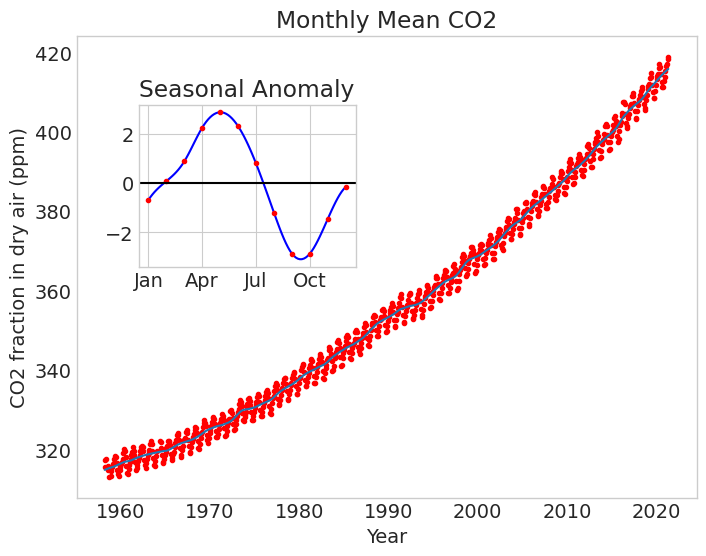

In [4]:
def detrend(f):
    detrended_xarr = ...
    # BEGIN SOLUTION
    detrended_xarr = pd.concat([f.year, f.month, f.c02-f.c02.mean()], axis=1)
    # END SOLUTION
    return detrended_xarr

dy = data.groupby('year')
c02anomaly = dy.apply(detrend)
monthly_anomaly = c02anomaly.groupby('month').mean()[['c02']]

from scipy.interpolate import CubicSpline

fig, ax = plt.subplots()

ax.plot("fraction_date", "data_filled", "r.", data=data)
ax.plot("fraction_date", "data_adjusted_seasonally_fit", data=data)
ax.set_xlabel("Year")
ax.set_ylabel("CO2 fraction in dry air (ppm)")
ax.set_title("Monthly Mean CO2")
ax.grid(False)


axin1 = ax.inset_axes([0.1,0.5,0.35,0.35])
mon_smooth = np.linspace(1,12,100)
mon_interp = CubicSpline(monthly_anomaly.index, monthly_anomaly.c02)
axin1.plot(mon_smooth, mon_interp(mon_smooth), "b")
axin1.plot(monthly_anomaly.index, monthly_anomaly.c02, "r.")
axin1.axhline(color = 'black')
axin1.set_xticks([1,4,7,10])
axin1.set_xticklabels(['Jan','Apr','Jul','Oct'])
axin1.set_title("Seasonal Anomaly");